Here we would like to Predict the weekly aggregated sales for four weeks in advance.

We start by Importing necessary libraries for data manipulation, visualization and forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Getting a quick description of the data, including the total number of entries, whether they are null or not, and the type of each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


We see that the "Description" and "Customer ID" for some of the records are missing

We provide a statistical summary of the dataframe, helpful in understanding the central tendency, dispersion and shape of the distribution of the dataset. 

In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


We see that there are negative values in the Quantity column. When predicting future sales as in question 1, negative quantities could still provide valuable information.

These negative quantities likely represent returns or cancelled orders. Including them in the total sales will give us a more accurate picture of the net sales, which is often more relevant for business operations than the gross sales.

For instance, if a company sells 100 units of an item one week, but 50 of these are returned the following week, the net sales for the first week would be 50 units, not 100. So including the returns (i.e., negative quantities) in our weekly aggregated sales calculation would give us a better estimate of the true sales figure.

However, this approach needs to be verified with the stakeholders (if possible) to ensure you're accurately capturing the business process. If for example, the negative quantities aren't representative of usual business operations (e.g., due to data errors or unusual events), we might want to treat them differently.

so we convert 'InvoiceDate' column to datetime format and setting it as the dataframe index for facilitating time-series analysis.

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
df

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France


## Compute weekly sales.
Sum the sales for each week. Sales can be computed by multiplying Quantity and UnitPrice.

In [6]:
df['Sales'] = df['Quantity'] * df['Price']
weekly_sales = df['Sales'].resample('W').sum()

In [7]:
weekly_sales

InvoiceDate
2009-12-06    258496.32
2009-12-13    232310.10
2009-12-20    256240.20
2009-12-27     52800.49
2010-01-03         0.00
                ...    
2011-11-13    346560.14
2011-11-20    380407.57
2011-11-27    308185.02
2011-12-04    319874.99
2011-12-11    300623.22
Freq: W-SUN, Name: Sales, Length: 106, dtype: float64

<Axes: xlabel='InvoiceDate'>

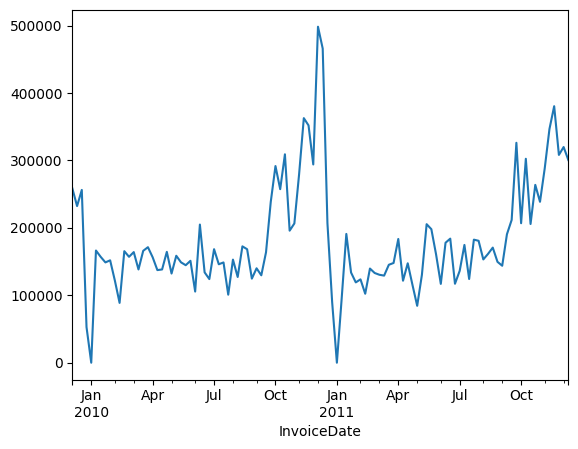

In [8]:
weekly_sales.plot()

we see in the data that the sales usually follow a base line during the year but close to the end of the year there is a rapid increase in sales just before new year's eve where the sales go to zero. and then the sales goes back to the baseline in the new year

We then transform the weekly_sales dataframe into a format suitable for Prophet, which requires a dataframe with two columns: 'ds' and 'y'. 'ds' is the datetime index and 'y' is the target variable (weekly sales in this case).

In [9]:
prophet_df = weekly_sales.reset_index()
prophet_df.columns = ['ds', 'y']
prophet_df

,ds,y
0,2009-12-06,258496.32
1,2009-12-13,232310.10
2,2009-12-20,256240.20
3,2009-12-27,52800.49
4,2010-01-03,0.00
...,...,...
101,2011-11-13,346560.14
102,2011-11-20,380407.57
103,2011-11-27,308185.02
104,2011-12-04,319874.99


Here we use Facebook's Prophet which is a powerful, flexible, and easy-to-use library for forecasting time series data. It's designed for making forecasts for business metrics such as CPU usage, website traffic, and sales, which often exhibit strong patterns based on time, such as seasonality and trends.

Prophet works by decomposing a time series into three main components:

Trend: The overall direction of the data—whether it is increasing, decreasing, or stagnant over time.

Seasonality: Periodic patterns in the data. This can include daily, weekly, or annual cycles.

Holidays/Events: Irregularities in the time series which are not due to the trend or the seasonal variation. For instance, sales promotions or holidays like Christmas might cause spikes in sales data that aren't accounted for by trend or seasonality.

Prophet uses an additive model for time series forecasting, where the time series value is expressed as a sum of these components:

y(t) = Trend(t) + Seasonality(t) + Holiday(t) + error

By default, Prophet uses a piecewise linear model for its trend. It automatically detects change points in the trend and allows the trend to adapt at these points. This makes Prophet powerful in forecasting data with non-linear trends.

Seasonality in Prophet is modeled using Fourier series. The number of Fourier terms determines how quickly the seasonality can change. More terms allow more flexibility in the model, enabling it to fit faster changing cycles.

Holidays and events are modeled using a regression model. You provide Prophet with a schedule of past and future events, and it uses this to fit these additional regressors.

Prophet also includes a parameter for uncertainty estimation. It uses a technique called Bayesian sampling to generate possible future scenarios and quantify uncertainty.

The strengths of Prophet come from its flexibility and the fact that it requires minimal input and tuning from the user. Its automatic feature engineering and model selection save time and effort, while still providing robust, interpretable results.

In [10]:
from prophet import Prophet
m = Prophet()

In [11]:
m.fit(prophet_df)

11:55:40 - cmdstanpy - INFO - Chain [1] start processing
11:55:40 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=10*7)
future.tail()

,ds
171,2012-02-15
172,2012-02-16
173,2012-02-17
174,2012-02-18
175,2012-02-19


Using the trained model to make forecasts for the future dates in the new dataframe. 
Displaying the last five rows of the forecast, including the forecasted value ('yhat') and its lower and upper bounds.

In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
171,2012-02-15,115330.347505,68841.494414,164766.400787
172,2012-02-16,118816.714550,70012.103832,165662.859055
173,2012-02-17,122847.915703,74319.702789,166902.616247
174,2012-02-18,127300.663794,77032.505766,176804.533498
175,2012-02-19,132043.715607,80235.568420,178099.302065


Plotting the forecasted sales and their confidence intervals.

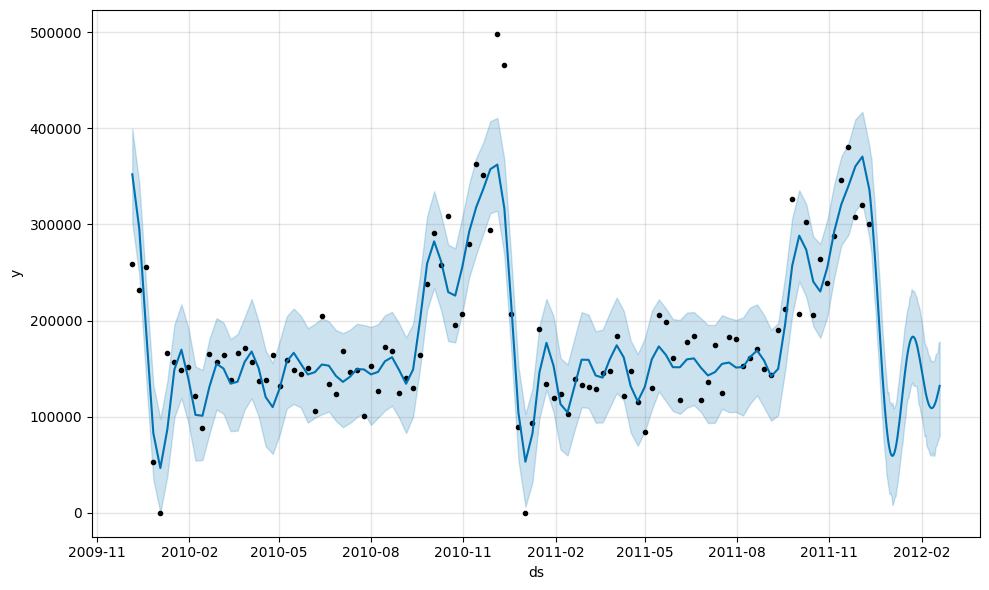

In [17]:
from prophet.plot import plot, plot_components
plot(m, forecast);

The model is able to fit the past data very well and also able to predict a reasonable future results

Plotting the components of the forecast showing the trend and yearly seasonality.

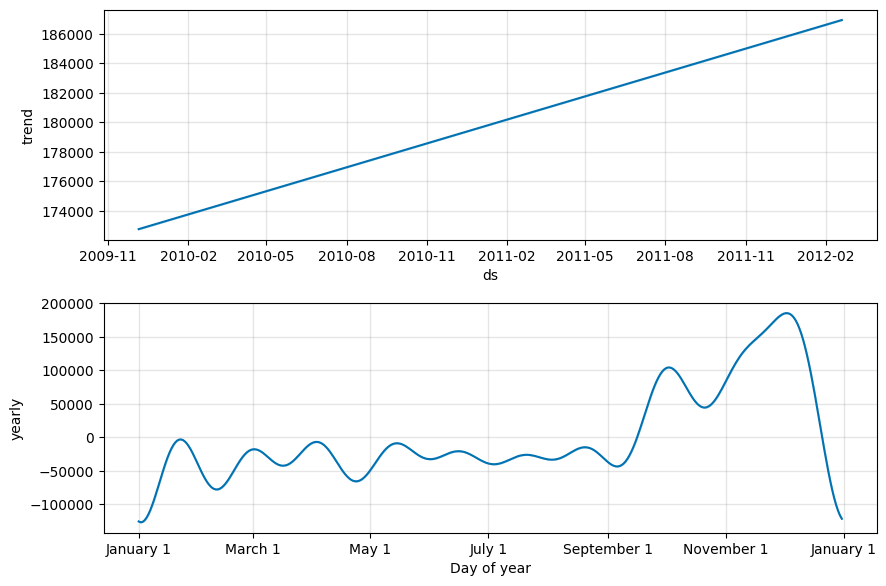

In [18]:
plot_components(m, forecast);

We see that the sales have an increasing trend and there is a peak in sales just before january as shown in the data.

Saving the trained model to a JSON file for potential future use.

In [16]:
from prophet.serialize import model_to_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model